In [1]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import yaml
import pprint
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import re
from src.formation import FormationCell

In [10]:
NOMINAL_CAPACITY_AH = 2.37

In [38]:
cell_num = []
retention_at_c3 = []
retention_at_c200 = []
retention_at_c300 = []
retention_at_c400 = []
retention_at_c450 = []
is_room_temp = []
is_baseline_formation = []
cycles_to_70_pct = []
cycles_to_80_pct = []

for this_cellnum in np.arange(1, 41):
    
    if this_cellnum == 9:
        continue
        
    Cell = FormationCell(this_cellnum)
    
    print(f'Working on cell {this_cellnum}')
    
    stats = Cell.get_aging_test_summary_statistics()
    
    cell_num.append(this_cellnum)
    retention_at_c200.append(stats['retention_at_c200'])
    retention_at_c3.append(stats['retention_at_c3'])
    retention_at_c300.append(stats['retention_at_c300'])
    retention_at_c400.append(stats['retention_at_c400'])
    retention_at_c450.append(stats['retention_at_c450'])
    cycles_to_70_pct.append(stats['cycles_to_70_pct'])
    cycles_to_80_pct.append(stats['cycles_to_80_pct'])
    
    is_room_temp.append(Cell.is_room_temp())
    is_baseline_formation.append(Cell.is_baseline_formation())



Working on cell 1
Working on cell 2
Working on cell 3
Working on cell 4
Working on cell 5
Working on cell 6
Working on cell 7
Working on cell 8
Working on cell 10
Working on cell 11
Working on cell 12
Working on cell 13
Working on cell 14
Working on cell 15
Working on cell 16
Working on cell 17
Working on cell 18
Working on cell 19
Working on cell 20
Working on cell 21
Working on cell 22
Working on cell 23
Working on cell 24
Working on cell 25
Working on cell 26
Working on cell 27
Working on cell 28
Working on cell 29
Working on cell 30
Working on cell 31
Working on cell 32
Working on cell 33
Working on cell 34
Working on cell 35
Working on cell 36
Working on cell 37
Working on cell 38
Working on cell 39
Working on cell 40


In [39]:
data_dict = dict()
data_dict['cellnum'] = cell_num
data_dict['is_room_temp'] = is_room_temp
data_dict['is_baseline_formation'] = is_baseline_formation
data_dict['retention_at_c3'] = retention_at_c3
data_dict['retention_at_c200'] = retention_at_c200
data_dict['retention_at_c300'] = retention_at_c300
data_dict['retention_at_c400'] = retention_at_c400
data_dict['retention_at_c450'] = retention_at_c450
data_dict['cycles_to_70_pct'] = cycles_to_70_pct
data_dict['cycles_to_80_pct'] = cycles_to_80_pct

df = pd.DataFrame(data_dict)

In [40]:
df_pivoted = pd.pivot_table(df, values=['cycles_to_70_pct', 
                                        'cycles_to_80_pct'], 
                                index=['is_room_temp', 'is_baseline_formation'],
                                aggfunc={'cycles_to_80_pct' : np.mean, 
                                         'cycles_to_70_pct' : np.mean})

In [41]:
df_pivoted

cycles_to_70_pct  cycles_to_80_pct
is_room_temp is_baseline_formation                                    
False        False                        491.300000        405.400000
             True                         379.666667        338.444444
True         False                        467.100000        414.900000
             True                         358.700000        326.500000

In [47]:
cell_num = []
is_room_temp = []
is_baseline_formation = []
capacity_at_mean_cycles_to_70 = []
capacity_at_mean_cycles_to_80 = []
cycles_to_70_target_vec = []
cycles_to_80_target_vec = []

for this_cellnum in np.arange(1, 41):
    
    print(f'Working on cell {this_cellnum}')
    
    if this_cellnum == 9:
        continue
        
    Cell = FormationCell(this_cellnum)

    df = Cell.get_aging_data_cycles()

    # 70 percent retention target
    if Cell.is_baseline_formation() and Cell.is_room_temp():
        cycles_target = 358
    elif not Cell.is_baseline_formation() and Cell.is_room_temp():
        cycles_target = 467
    elif Cell.is_baseline_formation() and not Cell.is_room_temp():
        cycles_target = 379
    elif not Cell.is_baseline_formation() and not Cell.is_room_temp():
        cycles_target = 491

    cycles_to_70_target_vec.append(cycles_target)
    capacity_at_mean_cycles_to_70.append(np.interp(cycles_target, df['Cycle Number'], 
                                                              df['Discharge Capacity (Ah)']))
    
    # 80 percent retention target
    if Cell.is_baseline_formation() and Cell.is_room_temp():
        cycles_target = 326
    elif not Cell.is_baseline_formation() and Cell.is_room_temp():
        cycles_target = 415
    elif Cell.is_baseline_formation() and not Cell.is_room_temp():
        cycles_target = 338
    elif not Cell.is_baseline_formation() and not Cell.is_room_temp():
        cycles_target = 405

    cycles_to_80_target_vec.append(cycles_target)
    capacity_at_mean_cycles_to_80.append(np.interp(cycles_target, df['Cycle Number'], 
                                                              df['Discharge Capacity (Ah)']))
    
    cell_num.append(this_cellnum)
    is_room_temp.append(Cell.is_room_temp())
    is_baseline_formation.append(Cell.is_baseline_formation())

Working on cell 1
Working on cell 2
Working on cell 3
Working on cell 4
Working on cell 5
Working on cell 6
Working on cell 7
Working on cell 8
Working on cell 9
Working on cell 10
Working on cell 11
Working on cell 12
Working on cell 13
Working on cell 14
Working on cell 15
Working on cell 16
Working on cell 17
Working on cell 18
Working on cell 19
Working on cell 20
Working on cell 21
Working on cell 22
Working on cell 23
Working on cell 24
Working on cell 25
Working on cell 26
Working on cell 27
Working on cell 28
Working on cell 29
Working on cell 30
Working on cell 31
Working on cell 32
Working on cell 33
Working on cell 34
Working on cell 35
Working on cell 36
Working on cell 37
Working on cell 38
Working on cell 39
Working on cell 40


In [48]:
data_dict = dict()
data_dict['cellnum'] = cell_num
data_dict['is_room_temp'] = is_room_temp
data_dict['is_baseline_formation'] = is_baseline_formation
data_dict['retention_at_mean_cycles_to_80'] = np.array(capacity_at_mean_cycles_to_80) / NOMINAL_CAPACITY_AH
data_dict['retention_at_mean_cycles_to_70'] = np.array(capacity_at_mean_cycles_to_70) / NOMINAL_CAPACITY_AH
data_dict['cycles_to_80_target_vec'] = cycles_to_80_target_vec
data_dict['cycles_to_70_target_vec'] = cycles_to_70_target_vec

df = pd.DataFrame(data_dict)


df.to_csv('retention_at_mean_cycles.csv')

In [49]:
df

,cellnum,is_room_temp,is_baseline_formation,retention_at_mean_cycles_to_80,retention_at_mean_cycles_to_70,cycles_to_80_target_vec,cycles_to_70_target_vec
0,1,False,True,0.768152,0.678762,338,379
1,2,False,True,0.704922,0.576871,338,379
2,3,False,True,0.861482,0.818793,338,379
3,4,False,True,0.723414,0.613229,338,379
4,5,False,True,0.790671,0.708689,338,379
5,6,False,True,0.821618,0.769591,338,379
6,7,False,True,0.798469,0.684314,338,379
7,8,False,True,0.814563,0.672173,338,379
8,10,False,True,0.804052,0.697384,338,379
9,11,True,True,0.807535,0.726475,326,358


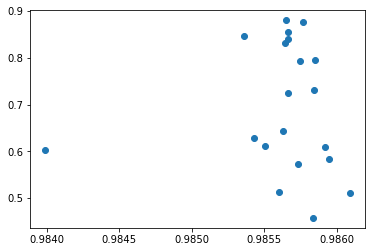

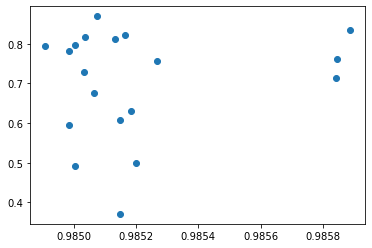

In [14]:
plt.figure()
idx = np.where(np.array(is_room_temp) == True)
plt.plot(np.array(retention_at_c3)[idx], np.array(retention_at_c400)[idx],
        marker='o', linestyle='none')

plt.figure()
idx = np.where(np.array(is_room_temp) == False)
plt.plot(np.array(retention_at_c3)[idx], np.array(retention_at_c400)[idx],
        marker='o', linestyle='none')
